In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
from sklearn.impute import KNNImputer
pd.set_option('display.float_format', '{:.2f}'.format)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:
data=pd.read_csv(r'C:\Users\chama\Downloads\dat\Cars24_data.csv')

In [3]:
df = data

In [4]:
df.head(1)

,Unnamed: 0,Name,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type,Month_of_Purchase
0,0,Maruti Alto LXI,174699,4.00,hyderabad,34854,2010,First,Petrol,MANUAL,RTOAP09,NaN,Expired,May


In [5]:
print('shape of data ',df.shape) 

shape of data  (32158, 14)


In [6]:
### Pre processing columns


In [7]:
df['Name'].nunique()  # getting unquie cars models  before processing 

2426

In [8]:
## Price column describe

In [9]:
df['Price'].describe() 

count      32158.00
mean      476093.75
std       452149.25
min            1.00
25%       210000.00
50%       368000.00
75%       600000.00
max     10801700.00
Name: Price, dtype: float64

In [10]:
df[df['Price']==1]     # since minimum value of price cannot be 1 we are replacing 1 with some average

,Unnamed: 0,Name,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type,Month_of_Purchase
18606,18606,Fiat Linea T JET PLUS,1,4.60,pune,31594,2014,Second,Petrol,NaN,RTOMH12,20/3/2021,Comprehensive,April


In [12]:
df[df['Name'].str.contains('Fiat Linea T JET PLUS')]

,Unnamed: 0,Name,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type,Month_of_Purchase
9656,9656,Fiat Linea T JET PLUS,200000,3.90,bengalore,92310,2010,Third,Petrol + LPG,NaN,RTOKA03,17/10/2021,Comprehensive,October
16291,16291,Fiat Linea T JET PLUS,212000,4.30,pune,61555,2010,Second,Petrol,NaN,RTOMH12,NaN,Expired,October
18606,18606,Fiat Linea T JET PLUS,1,4.60,pune,31594,2014,Second,Petrol,NaN,RTOMH12,20/3/2021,Comprehensive,April


In [13]:
df.loc[18606,'Price']=(200000+212000)/2 # replacing min value which 1 with their corresponding average

In [14]:
df['city']=df['city'].replace('bengalore','bangalore') # spell check

In [15]:
## Finding null values

In [16]:
df['Insurance_Type'].fillna(df['Insurance_Type'].mode()[0], inplace=True)  # filling missing values using mode

In [17]:
df['Transmission'].fillna(df['Transmission'].mode()[0], inplace=True)# filling missing values using mode

In [18]:
df.drop('Insurance',axis=1,inplace=True)# dropping insurance column because it has mostly null values

In [19]:
df.head()

,Unnamed: 0,Name,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance_Type,Month_of_Purchase
0,0,Maruti Alto LXI,174699,4.00,hyderabad,34854,2010,First,Petrol,MANUAL,RTOAP09,Expired,May
1,1,Maruti Wagon R . VXI,333999,4.20,hyderabad,39541,2013,Second,Petrol,MANUAL,RTOAP28,Comprehensive,July
2,2,Maruti Wagon R . VXI,353199,4.30,hyderabad,23233,2014,Second,Petrol,MANUAL,RTOAP28,Comprehensive,March
3,3,Hyundai Eon D LITE PLUS,237899,4.40,hyderabad,27748,2013,First,Petrol,MANUAL,RTOAP13,Comprehensive,November
4,4,Hyundai Eon ERA PLUS,300699,4.40,hyderabad,12238,2017,Second,Petrol,MANUAL,RTOTS10,Expired,August


In [20]:
print('checking nan values if any:',df.isnull().values.sum())

checking nan values if any: 0


In [21]:
y_train_df=df['Price']# separating target variable from main dataframe
df.drop('Price',axis=1,inplace=True) # dropping target variable from main data frame
df.head()

,Unnamed: 0,Name,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance_Type,Month_of_Purchase
0,0,Maruti Alto LXI,4.00,hyderabad,34854,2010,First,Petrol,MANUAL,RTOAP09,Expired,May
1,1,Maruti Wagon R . VXI,4.20,hyderabad,39541,2013,Second,Petrol,MANUAL,RTOAP28,Comprehensive,July
2,2,Maruti Wagon R . VXI,4.30,hyderabad,23233,2014,Second,Petrol,MANUAL,RTOAP28,Comprehensive,March
3,3,Hyundai Eon D LITE PLUS,4.40,hyderabad,27748,2013,First,Petrol,MANUAL,RTOAP13,Comprehensive,November
4,4,Hyundai Eon ERA PLUS,4.40,hyderabad,12238,2017,Second,Petrol,MANUAL,RTOTS10,Expired,August


In [22]:
df1=pd.DataFrame(df) # creating duplicate dataframe

In [23]:
df=pd.get_dummies(df,columns=['Name','city','Year_of_Purchase','Owner','Fuel_Type','Transmission','RTO','Insurance_Type','Month_of_Purchase'])


In [24]:
X_train, X_test, y_train, y_test = train_test_split(df, y_train_df, test_size = 0.3,random_state=22)


print('Shape of Xtrain ',X_train.shape)
print('Shape of Xtest ',X_test.shape)
print('Shape of ytrain ',y_train.shape)
print('Shape of ytest ',y_test.shape)

Shape of Xtrain  (22510, 3290)
Shape of Xtest  (9648, 3290)
Shape of ytrain  (22510,)
Shape of ytest  (9648,)


In [ ]:
## Modelling ( code reference - Kaggle)

In [25]:
def plot_loss_distribu(y_actual,y_pred):
    """Utility funtion which prints metrics and plots distribution of loss value"""
    
    df=pd.DataFrame({'act':y_actual,'pred':y_pred})
    loss = df['act'] - df["pred"] # loss 

    plt.show()
   
    plt.figure(figsize=(15,5))
    plt.title('CDF graph of residuals' ) # plotting cdf of loss
    plt.xlabel('Loss')
    sns.ecdfplot( x=loss )
    
    
    
    plt.figure(figsize=(15,5))
    plt.title('PDF graph of residuals' )  # plotting pdf of loss
    plt.xlabel('Loss')
    plt.hist(loss, bins = int(1800),
             color = 'blue', edgecolor = 'blue')
    plt.show()
    
    print('_'*50)
    print('r2 score :',r2_score(y_actual,y_pred))
    print('mse :',mean_squared_error(y_actual,y_pred))
   
    
   

In [26]:
## Linear Regression 

In [27]:
from sklearn.linear_model import LinearRegression



model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

---------=======================------------For train data----------======================--------------


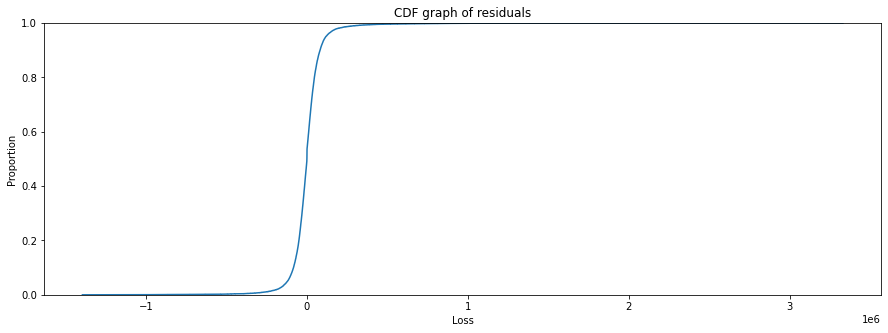

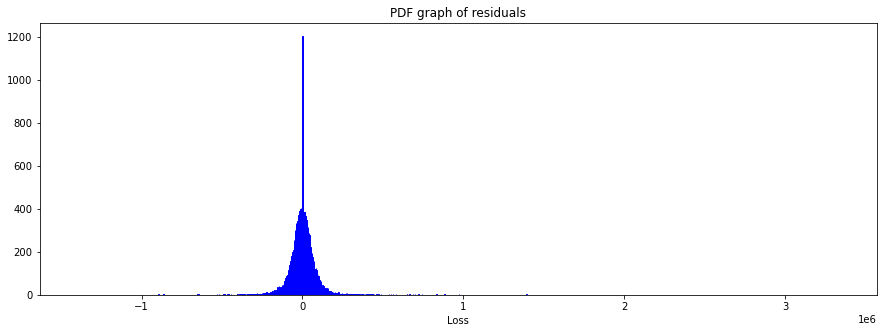

__________________________________________________
r2 score : 0.9376039715564948
mse : 12745336516.931938
---------=======================------------For test data-----------=======================-------------


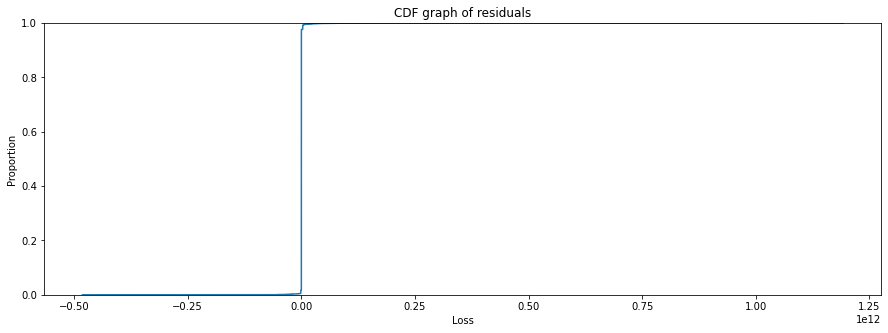

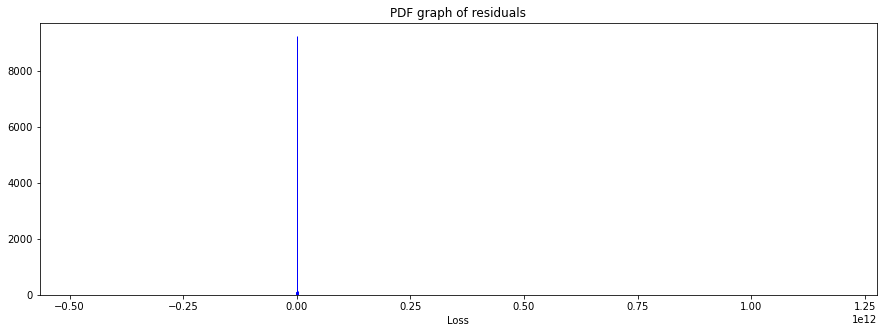

__________________________________________________
r2 score : -1052915536.462818
mse : 2.1564439860627528e+20


In [29]:

y_pred_train=model.predict(X_train)

y_pred = model.predict(X_test)

print('---------=======================------------For train data----------======================--------------')
plot_loss_distribu(y_train,y_pred_train)
print('---------=======================------------For test data-----------=======================-------------')
plot_loss_distribu(y_test,y_pred)



In [31]:
## Decision Tree Regressor 

In [32]:
dtm = DecisionTreeRegressor()

param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtm, param_grid, 
                           verbose=2,n_jobs=-1)

grid_cv_dtm.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 178.5min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 299.1min finished


GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]},
             verbose=2)

In [33]:
print('Best parameters obtained after tuning:',grid_cv_dtm.best_params_)

Best parameters obtained after tuning: {'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 100, 'min_samples_split': 10}


In [34]:
dt=DecisionTreeRegressor(criterion='mse', max_depth= 8, max_leaf_nodes= 100, min_samples_leaf= 40, min_samples_split= 10)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=100, min_samples_leaf=40,
                      min_samples_split=10)

---------=======================------------For train data----------======================--------------


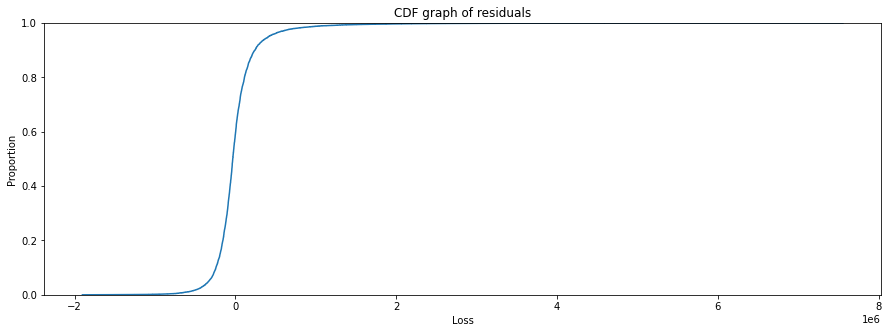

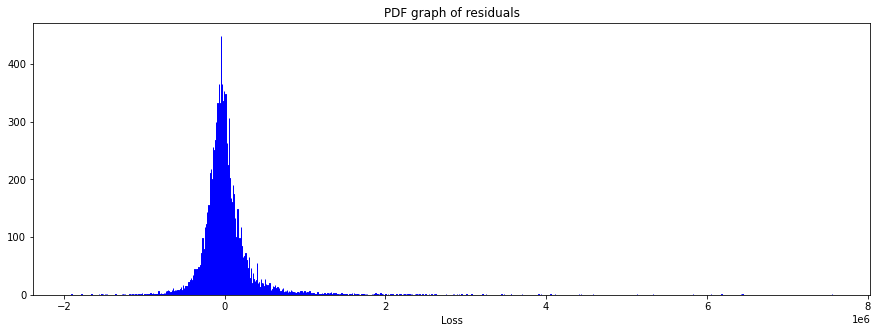

__________________________________________________
r2 score : 0.49418431523347817
mse : 103320536237.7952
---------=======================------------For test data-----------=======================-------------


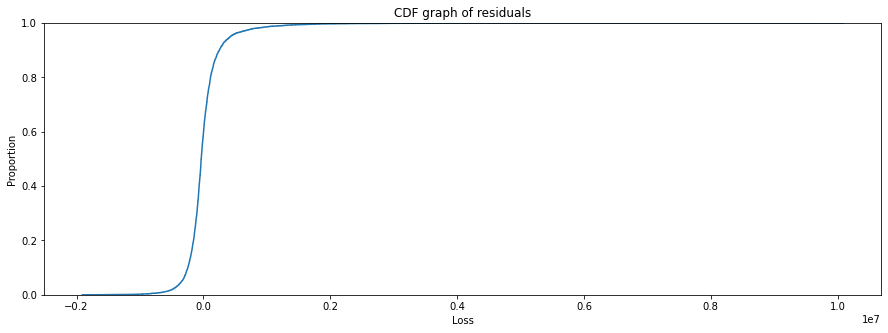

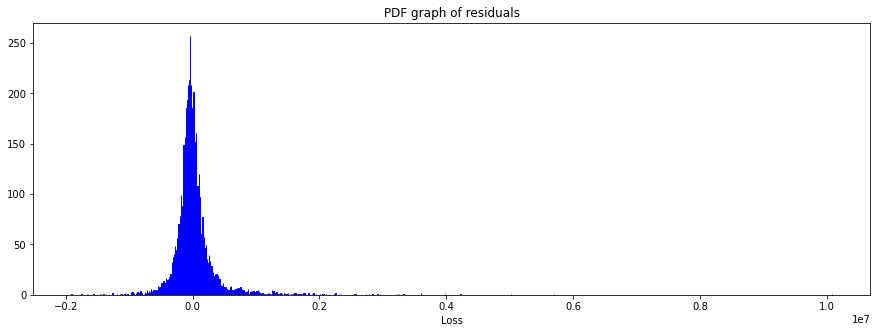

__________________________________________________
r2 score : 0.4534696223186919
mse : 111933208716.00119


In [39]:

y_pred_train=dt.predict(X_train)

y_pred = dt.predict(X_test)

print('---------=======================------------For train data----------======================--------------')
plot_loss_distribu(y_train,y_pred_train)
print('---------=======================------------For test data-----------=======================-------------')
plot_loss_distribu(y_test,y_pred)


